#  Predicting the Sale Price of Houses using Machine Learning


## 1. Problem defition

> This project aims to build a machine learning model that will give the best future sales prediction of homes and improve the log error i.e. the error due to the difference between the actual and the predicted home values.

## 2. Data
The data is downloaded from the Kaggle Bluebook for Zillow price competition: https://www.kaggle.com/c/zillow-prize-1/data

There are 3 main datasets:

* properties_2016.csv - all the properties with their home features for 2016. 
* properties_2017.csv - all the properties with their home features for 2017 (released on 10/2/2017)
* train_2016.csv - the training set with transactions from 1/1/2016 to 12/31/2016
* train_2017.csv - the training set with transactions from 1/1/2017 to 9/15/2017 (released on 10/2/2017)

## 3. Evaluation
The evaluation metric for this competition is the MAE (Mean Absolute Error) between the predicted log error and the actual log error.

For more on the evaluation of this project check: https://www.kaggle.com/c/zillow-prize-1/overview/evaluation

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset.

There are two datasets available –

* train_2016 – This dataset consists of the target variable i.e., the logerror 
* properties_2016 – Contents all the features related to the property/home.
 

There are around 60 attributes in the dataset on basis of which the model can be built.

Some of the important features amongst them are as follows: 

* train_2016: 
    1. parcelid - Unique identification for every parcel
    2. transactiondate - The date on which the home was sold
    3. logerror - The residual between the actual and the predicted sale price of homes. (Target Array)
 

* properties_2016:
    1. parcelid - Unique identification for every parcel (common in both the datasets)
    2. bathroomcnt - Total number of bathrooms in the house  
    3. bedroomcnt - Total number of bedrooms in the house
    4. buildingqualitytypeid - This gives the quality assessment of the building ranging from best to worst.
    5. finishedsqaurefeet12 - Finished living area of the house. 
    6. fips - This stand for Federal Information Processing Standard code (for more detail regarding this check:https://en.wikipedia.org/wiki/FIPS_county_code
    7. latitude & longitude - longitude and latitude of the home location 
    8. propertylandusetypeid - This gives the type of land the property is zoned for.
    9regionidcity - The city in which the property is situated.
regionidcounty - The county where the property is situated. 
regionidzip - This provides the zip code for the location of the property.
taxamount - Property tax for each assessment year

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
properties_2016 = pd.read_csv("../../../../../House_price_regression_data/properties_2016.csv")
train_2016 = pd.read_csv("../../../../../House_price_regression_data/train_2016_v2.csv")

In [3]:
properties_2016.shape

(2985217, 58)

In [4]:
train_2016.shape

(90275, 3)

In [5]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [6]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [7]:
final_df = pd.merge(properties_2016, train_2016, how='inner', on='parcelid')
final_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [8]:
final_df.shape

(90275, 60)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

In [10]:
categorical = final_df.select_dtypes(include='object').columns
categorical

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag', 'transactiondate'],
      dtype='object')

In [11]:
final_df.isnull().sum()

parcelid                            0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquar

In [12]:
final_df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+07,25218.0

### Dealing with the missing values:

In [13]:
mis_val = [var for var in final_df.columns if final_df[var].isnull().sum()>0]

final_df[mis_val].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

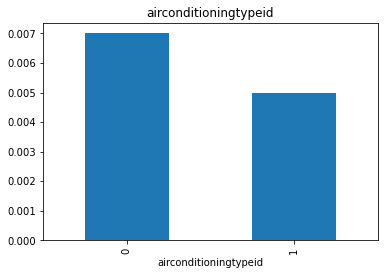

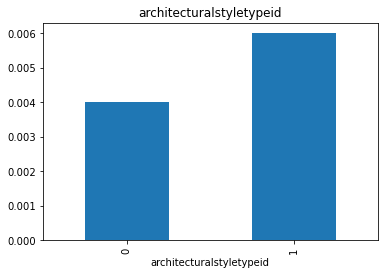

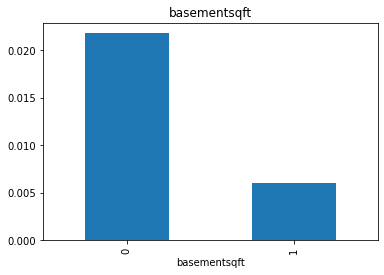

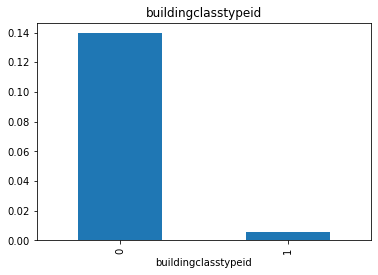

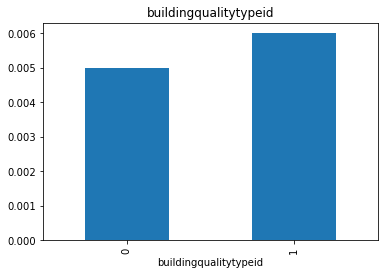

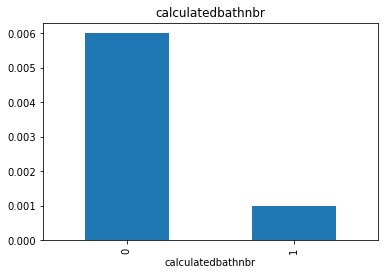

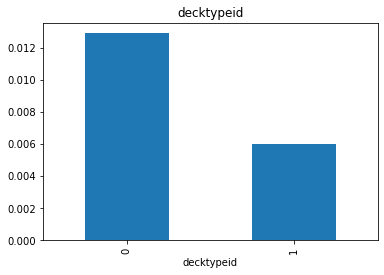

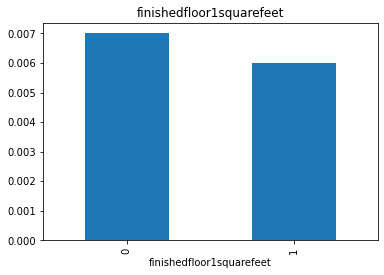

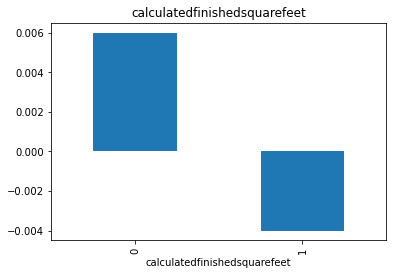

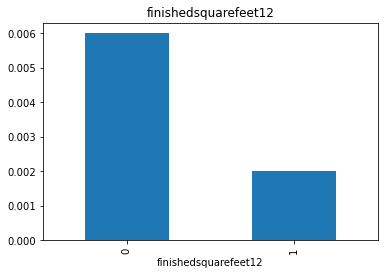

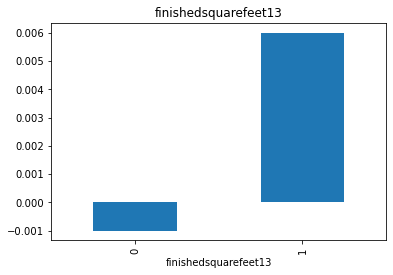

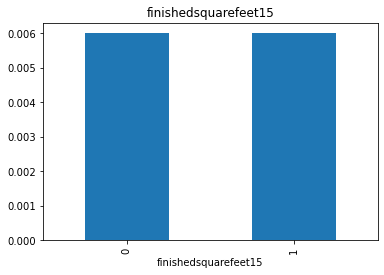

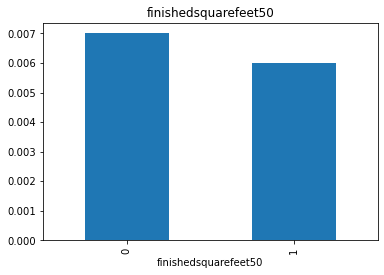

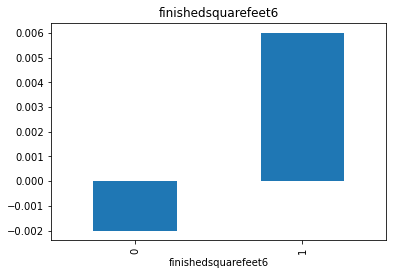

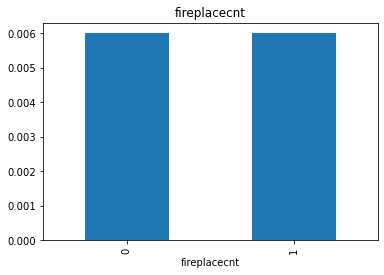

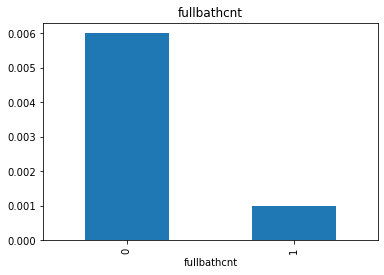

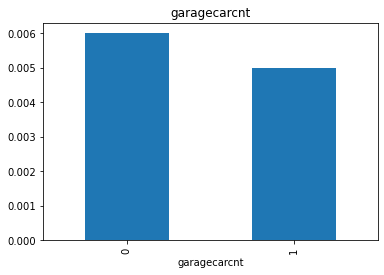

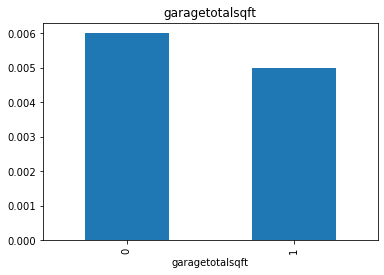

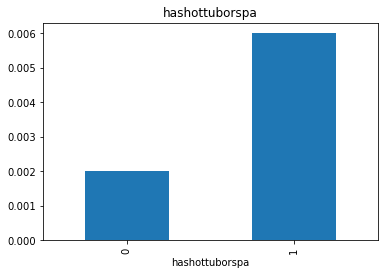

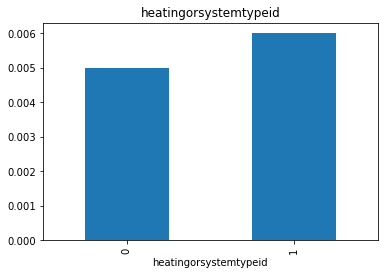

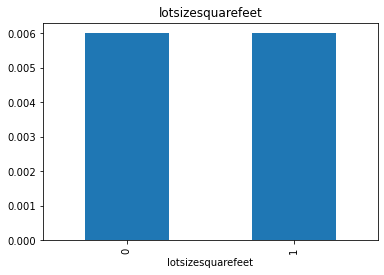

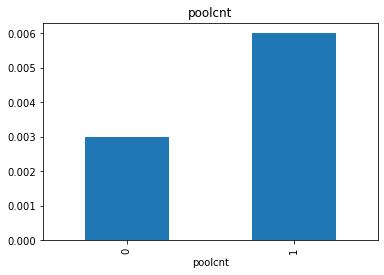

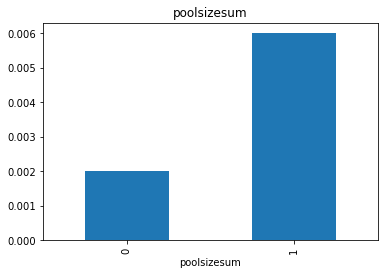

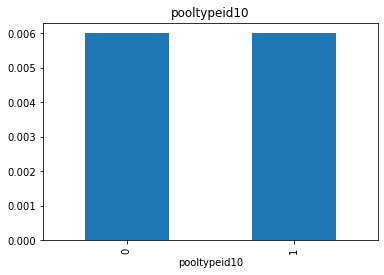

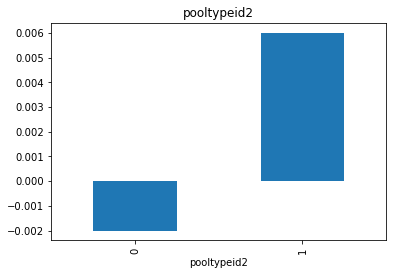

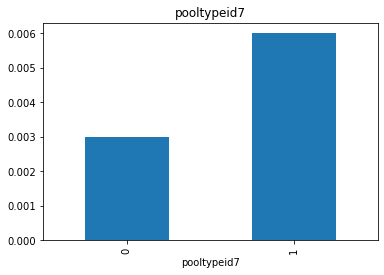

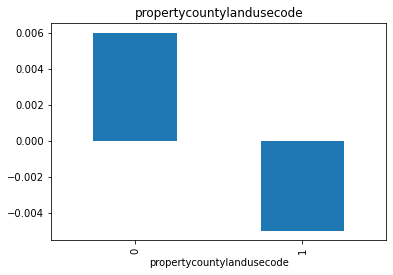

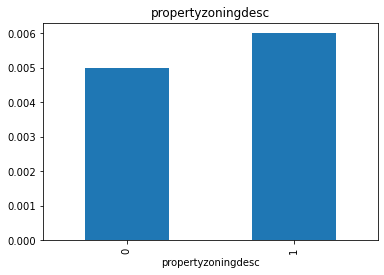

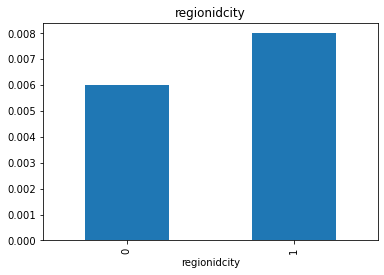

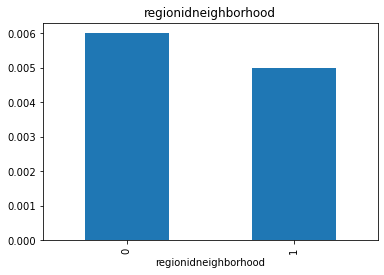

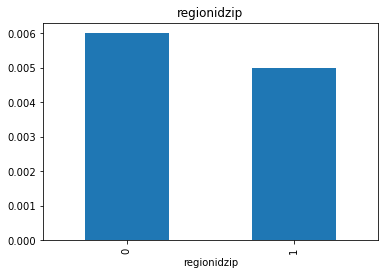

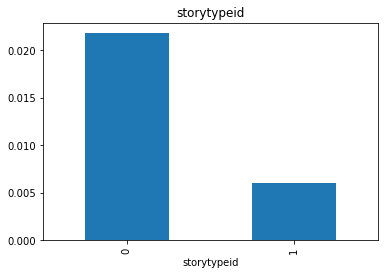

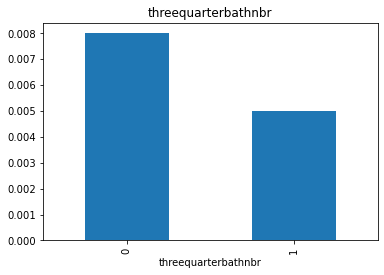

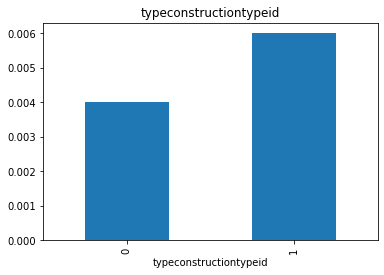

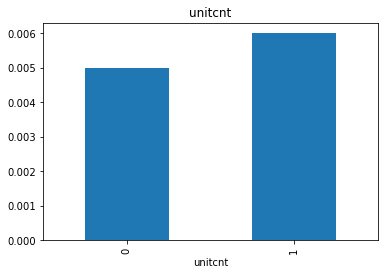

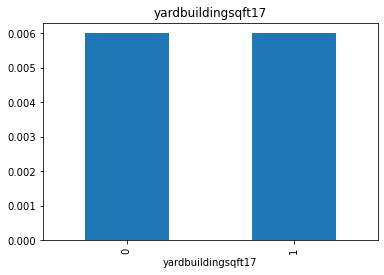

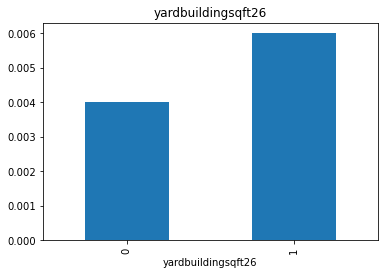

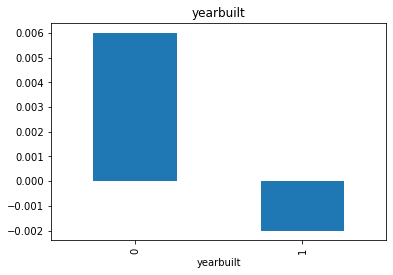

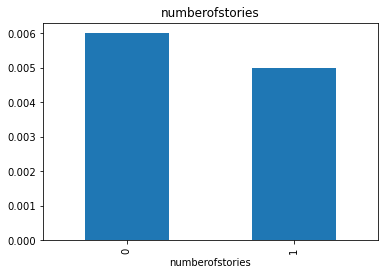

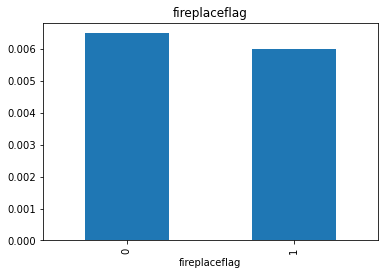

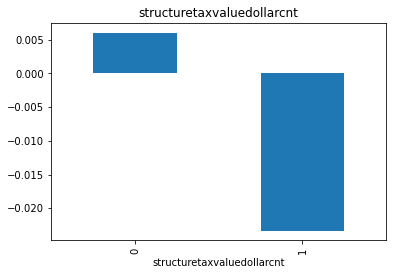

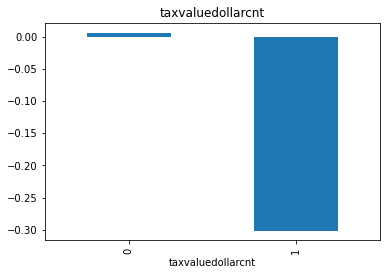

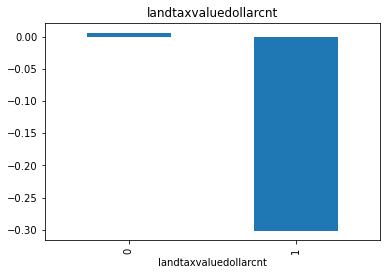

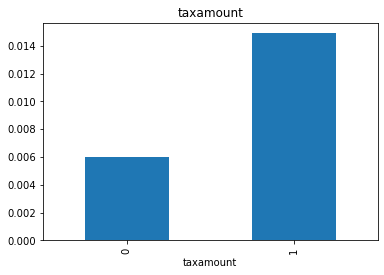

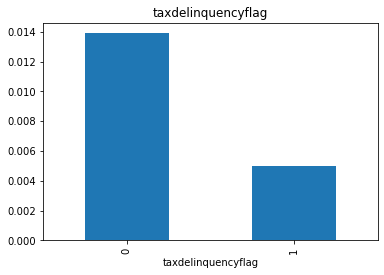

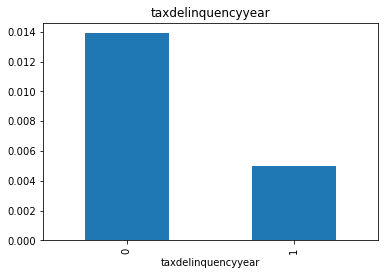

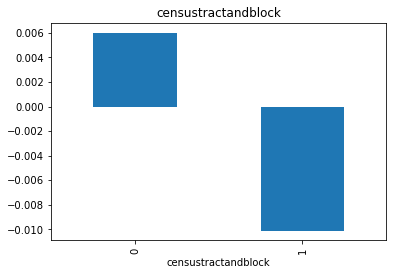

In [14]:
# Relationship between missing values and target_variables(log error) :
def analyze_missing_values(df, var):
    new_df = df.copy()
    new_df[var] = np.where(new_df[var].isnull(),1,0)
    new_df.groupby(var)['logerror'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in mis_val:
    analyze_missing_values(final_df, var)